Importing Libraries

In this dataset,there is class imbalancement issue and for this we can also use the class weight parameter and we can also handle the class imbalancment issue with differnrt techniques like undersampling,oversampling,SMOTE(I have use SMOTE for this dataset)...
If the dataset is imbalanced then for this dataset we have to focus on precison (performance metric)...and for this we have to less the FP rate using hyperparameter tunning

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import gradio as gr
import pickle
import sklearn

In [2]:
print('Numpy',np.__version__)
print('Pandas',pd.__version__)
print('Seaborn',sns.__version__)
print('Sklearn',sklearn.__version__)

Numpy 1.26.4
Pandas 2.2.2
Seaborn 0.13.2
Sklearn 1.4.2


Loading the Dataset

In [4]:
df = pd.read_csv('Pump Data.csv')

Performing EDA(Exploratory Data Analysis)

Understanding the Dataset Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Vibration_levels_mm_per_s  1000 non-null   float64
 1   Operating_temperature_C    1000 non-null   float64
 2   Motor_current_A            1000 non-null   float64
 3   Pump_flow_rate_m3_per_hr   1000 non-null   float64
 4   Operational_hours          1000 non-null   float64
 5   Impending_failure          1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


Previewing the Dataset

In [6]:
df.head()

,Vibration_levels_mm_per_s,Operating_temperature_C,Motor_current_A,Pump_flow_rate_m3_per_hr,Operational_hours,Impending_failure
0,2.130743,131.951195,45.968723,186.529089,1647.083672,0
1,4.361117,140.734820,43.594530,215.995100,1932.563276,0
2,2.029483,150.956038,50.399729,201.598715,5110.790206,0
3,2.552384,147.472330,51.631283,156.586015,4445.497013,0
4,2.399972,162.007813,49.590137,230.574080,3679.721863,0


Statistical summaries of numerical columns

In [7]:
df.describe()

,Vibration_levels_mm_per_s,Operating_temperature_C,Motor_current_A,Pump_flow_rate_m3_per_hr,Operational_hours,Impending_failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.992501,149.373652,50.169758,202.197398,9881.359407,0.134000
std,0.993214,9.798174,4.873759,30.302393,5735.259296,0.340823
min,0.500000,120.185205,40.000000,105.902713,21.067636,0.000000
25%,2.285318,143.030398,46.664668,181.876345,4699.825965,0.000000
50%,3.016617,149.483744,50.141578,202.171653,10061.229877,0.000000
75%,3.681069,156.159547,53.646115,222.436560,14700.517465,0.000000
max,5.000000,180.371448,60.000000,296.779987,19990.504441,1.000000


Analyzing Class Distribution

In [8]:
df['Impending_failure'].value_counts()

Impending_failure
0    866
1    134
Name: count, dtype: int64

Checking Null values

In [9]:
df.isnull().sum()

Vibration_levels_mm_per_s    0
Operating_temperature_C      0
Motor_current_A              0
Pump_flow_rate_m3_per_hr     0
Operational_hours            0
Impending_failure            0
dtype: int64

Checking for duplicates

In [10]:
df.duplicated().sum()

0

Checking Data types

In [11]:
df.dtypes

Vibration_levels_mm_per_s    float64
Operating_temperature_C      float64
Motor_current_A              float64
Pump_flow_rate_m3_per_hr     float64
Operational_hours            float64
Impending_failure              int64
dtype: object

Dataset Dimensions

In [12]:
df.shape

(1000, 6)

Visualizing Feature Distributions with Box Plots

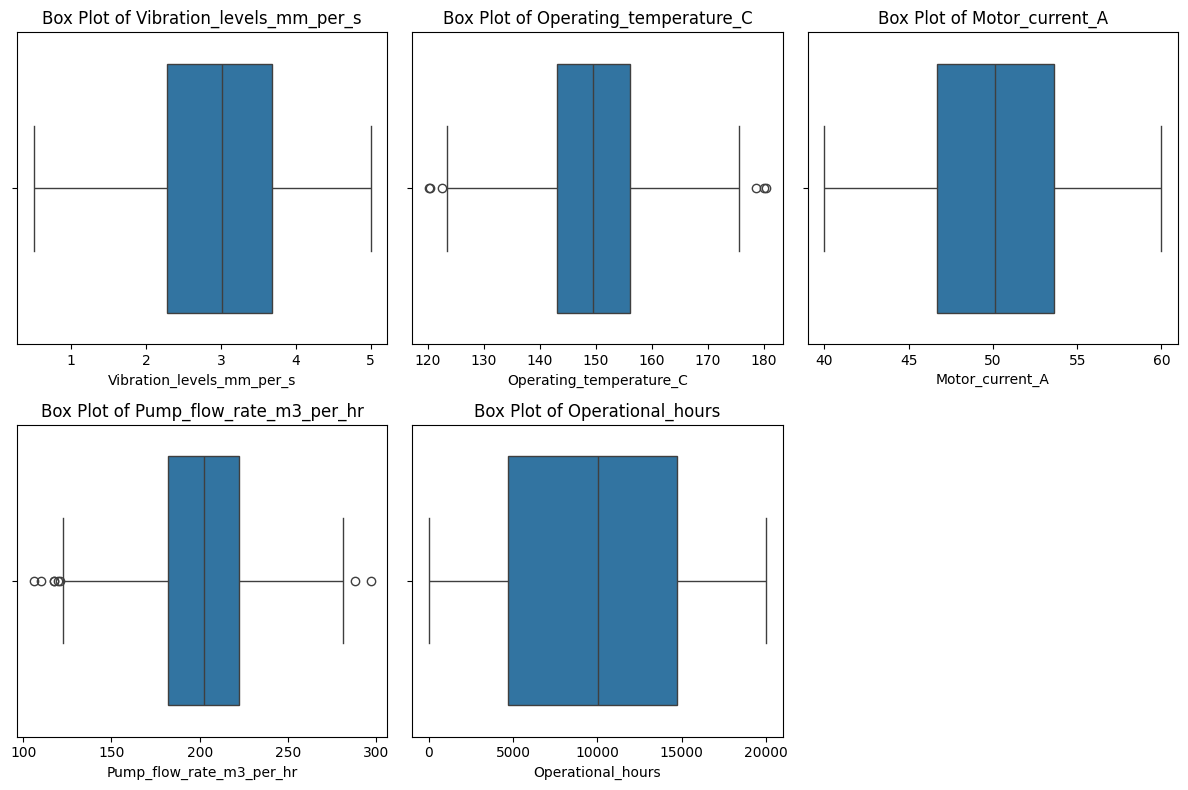

In [13]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Vibration_levels_mm_per_s', 'Operating_temperature_C', 'Motor_current_A', 'Pump_flow_rate_m3_per_hr', 'Operational_hours']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

Handling the Outliers

In [14]:
# Calculating IQR for 'operating_temperature_C'
Q1_temp = df['Operating_temperature_C'].quantile(0.25)
Q3_temp = df['Operating_temperature_C'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

# Calculating IQR for 'pump_flow_rate_m3_per_hr'
Q1_flow = df['Pump_flow_rate_m3_per_hr'].quantile(0.25)
Q3_flow = df['Pump_flow_rate_m3_per_hr'].quantile(0.75)
IQR_flow = Q3_flow - Q1_flow
lower_bound_flow = Q1_flow - 1.5 * IQR_flow
upper_bound_flow = Q3_flow + 1.5 * IQR_flow
#handling outliers by capping method
df['Operating_temperature_C'] = df['Operating_temperature_C'].clip(lower=lower_bound_temp, upper=upper_bound_temp)
df['Pump_flow_rate_m3_per_hr'] = df['Pump_flow_rate_m3_per_hr'].clip(lower=lower_bound_flow, upper=upper_bound_flow)

Visualizing the outliers by boxplot

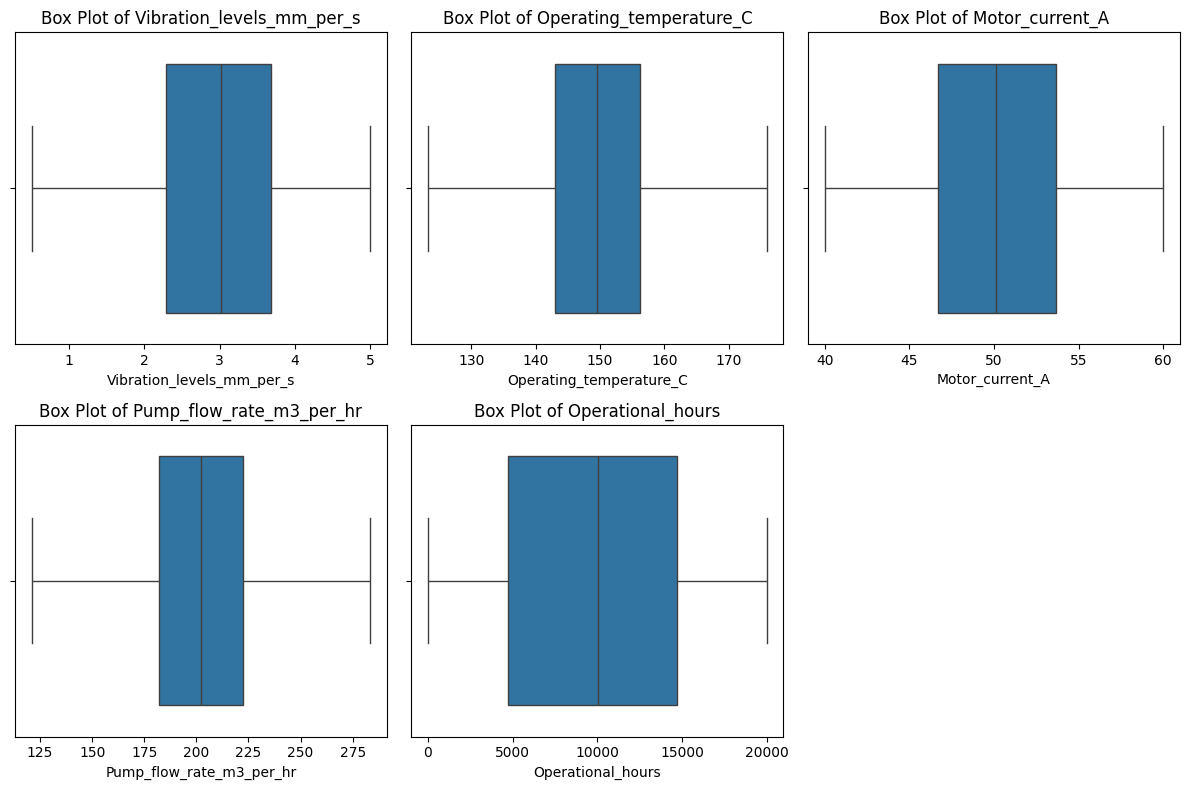

In [15]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Vibration_levels_mm_per_s', 'Operating_temperature_C', 'Motor_current_A', 'Pump_flow_rate_m3_per_hr', 'Operational_hours']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Exploring Feature Distributions

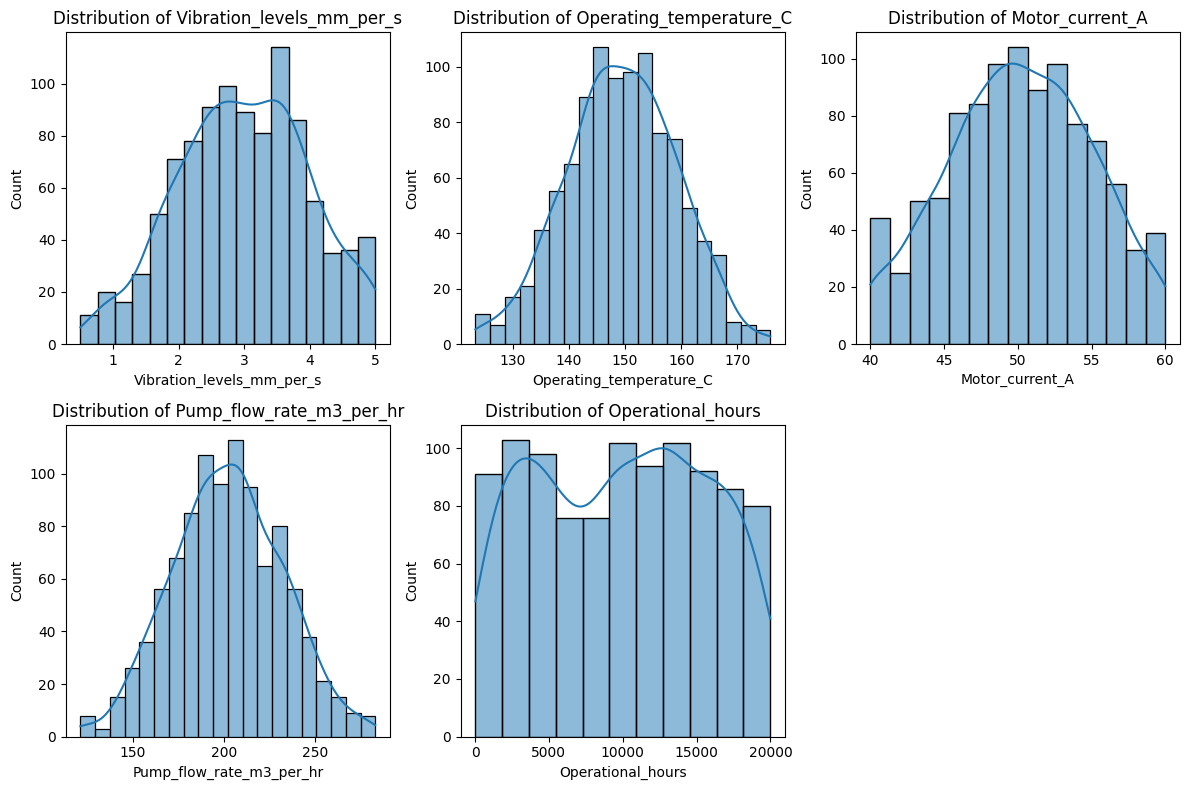

In [16]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Vibration_levels_mm_per_s', 'Operating_temperature_C', 'Motor_current_A', 'Pump_flow_rate_m3_per_hr', 'Operational_hours']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True) 
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Visualizing Relationships Between Features

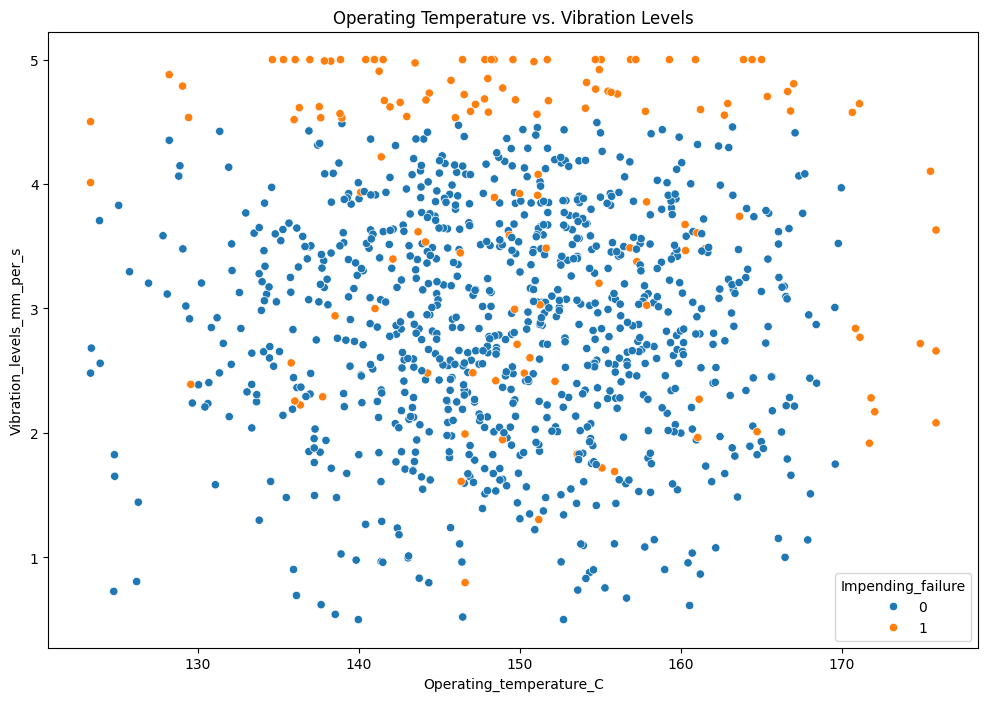

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Operating_temperature_C', y='Vibration_levels_mm_per_s', hue='Impending_failure', data=df)
plt.title('Operating Temperature vs. Vibration Levels')
plt.show()

Pandas Profilling

In [18]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [15]:
profile.to_file('data_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Saved..Can view it from there

Separating Features and Target Variable

In [19]:
X = df.drop(columns='Impending_failure')
y = df['Impending_failure']

Splitting the Dataset into Training and Testing Sets

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

HANDLING THE CLASS IMBALANCED WITH SMOTE

 APPLYING SMOTE 

In [21]:
smote = SMOTE(random_state=42)
X_resampled_smote,y_resampled_smote = smote.fit_resample(X_train,y_train)

In [22]:
X_test.shape

(200, 5)

In [28]:
X_resampled_smote.shape

(1398, 5)

In [29]:
y_resampled_smote.shape

(1398,)

In [30]:
y_resampled_smote.sample(15)

639     0
846     1
689     0
213     0
161     0
1299    1
430     1
556     0
788     0
273     0
20      0
1112    1
1001    1
26      0
507     0
Name: Impending_failure, dtype: int64

In [31]:
y_resampled_smote.value_counts()

Impending_failure
0    699
1    699
Name: count, dtype: int64

Visualizing Class Distribution Before SMOTE

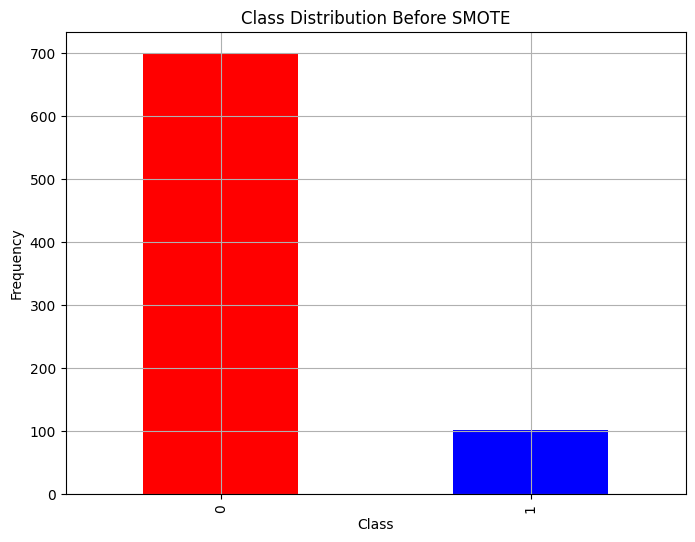

In [32]:
plt.figure(figsize=(8, 6))
y_train.value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Visualizing Class Distribution After SMOTE

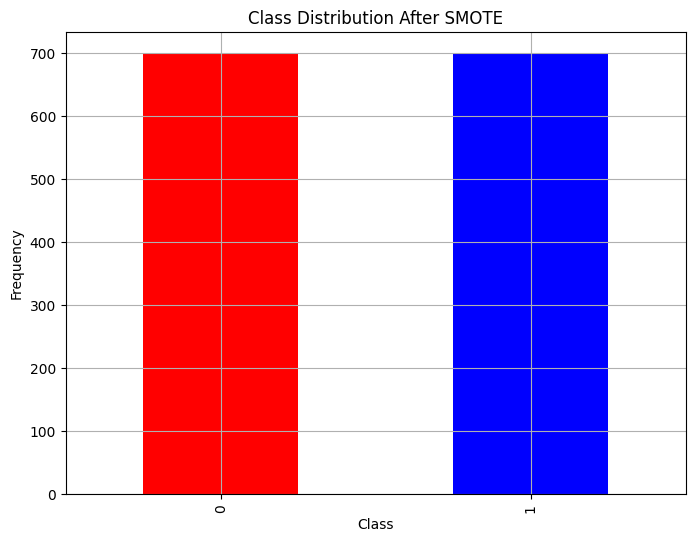

In [33]:
plt.figure(figsize=(8, 6))
y_resampled_smote.value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Deciding Between Standardization and Normalization

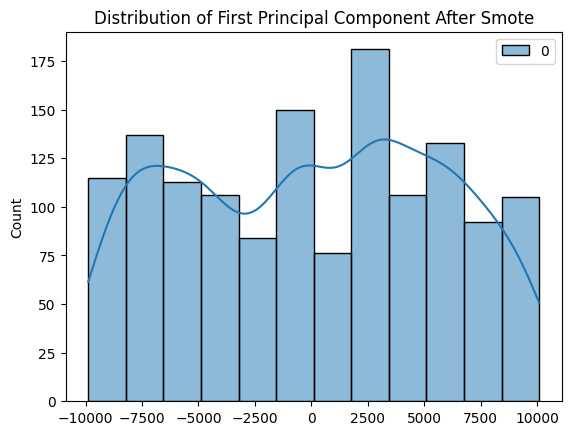

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(X_resampled_smote)
sns.histplot(principal_components, kde=True)
plt.title('Distribution of First Principal Component After Smote')
plt.show()

In [34]:
scalar = StandardScaler()

In [35]:
#Scaling the smote 

In [36]:
scalar.fit(X_resampled_smote)
X_train_scaled_smote = scalar.transform(X_resampled_smote)
X_test_scaled_smote = scalar.transform(X_resampled_smote)

In [37]:
X_train_scaled_smote = pd.DataFrame(X_train_scaled_smote,columns=X_train.columns)
X_test_scaled_smote = pd.DataFrame(X_test_scaled_smote,columns = X_test.columns)

In [38]:
#stcaling without smote

In [39]:
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [41]:
df.corr()['Impending_failure']

Vibration_levels_mm_per_s    0.370245
Operating_temperature_C      0.054010
Motor_current_A              0.305946
Pump_flow_rate_m3_per_hr    -0.013416
Operational_hours           -0.001555
Impending_failure            1.000000
Name: Impending_failure, dtype: float64

# DECISION TREE CLASSIFIER

In [ ]:
# DECISION TREE CLASSIFIER With Smote

In [42]:
model = DecisionTreeClassifier()

In [44]:
model.fit(X_train_scaled_smote,y_resampled_smote)

DecisionTreeClassifier()

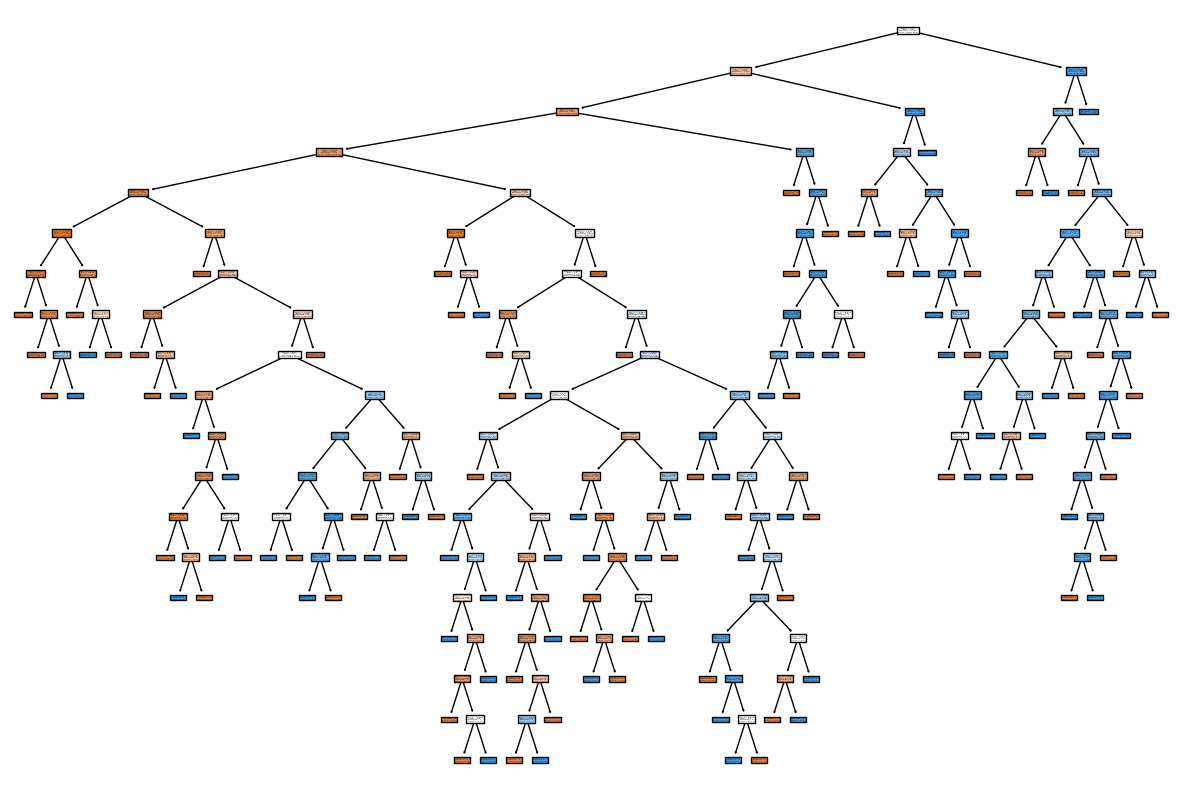

In [45]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [48]:
y_pred = model.predict(X_test)

In [49]:
score = accuracy_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)

array([[  1, 166],
       [  0,  33]], dtype=int64)

In [50]:
print(score)

0.17


In [51]:
cr = classification_report(y_pred,y_test)

In [52]:
print(cr)

              precision    recall  f1-score   support

           0       0.01      1.00      0.01         1
           1       1.00      0.17      0.28       199

    accuracy                           0.17       200
   macro avg       0.50      0.58      0.15       200
weighted avg       1.00      0.17      0.28       200



# Now applying the decison tree classifier with hyperparameter tunning

In [54]:
model = DecisionTreeClassifier()

In [55]:
parameter_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2 ],
    'min_weight_fraction_leaf': [0.1, 0.2],
    'max_leaf_nodes': [1, 10, 20],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'class_weight': [None, {0: 1, 1: 2}],
    'ccp_alpha': [0.0, 0.01, 0.1],
    'random_state': [42]
}

In [56]:
grid_search = GridSearchCV(model, param_grid=parameter_grid, scoring='accuracy', cv=5)

In [57]:
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
8640 fits failed out of a total of 25920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'class_weight': [None, {0: 1, 1: 2}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 30], 'max_leaf_nodes': [1, 10, 20],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy')

In [63]:
print(grid_search.best_params_)

{'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': 42, 'splitter': 'best'}


In [64]:
print(grid_search.best_score_)

0.9662499999999999


In [65]:
y_pred = grid_search.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)

In [67]:
print(accuracy)

0.97


decisison tree algorithm with class weight parameter

In [90]:
model_classweight = DecisionTreeClassifier(class_weight = {0: 1, 1: 2})

In [91]:
model_classweight.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2})

In [92]:
y_pred_DTC = model_classweight.predict(X_test_scaled)

In [93]:
cr_DTC = classification_report(y_pred_DTC,y_test)

In [94]:
print(cr_DTC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00        33

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



RANDOM FOREST ALGORITHM with smote

In [95]:
rf_model = RandomForestClassifier()

In [48]:
rf_model.fit(X_resampled_smote, y_resampled_smote)

RandomForestClassifier()

In [49]:
y_pred = rf_model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)

In [51]:
accuracy

0.915

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       167
           1       0.66      1.00      0.80        33

    accuracy                           0.92       200
   macro avg       0.83      0.95      0.87       200
weighted avg       0.94      0.92      0.92       200



# NOW APPLYING THE LOGISTIC REGRESSION MODEL

In [53]:
lg_reg = LogisticRegression(random_state=42)
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,7,8,10,20,30,40,50],'max_iter':[10,20,30,40,50,60,70,80,90,100],'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},{0:5,1:10},{0:50,1:100}]}

In [54]:
classifier_regressor = GridSearchCV(lg_reg,param_grid=parameter,scoring='accuracy',cv=5)


In [55]:
classifier_regressor.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40, 50],
                         'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 5, 1: 10}, {0: 50, 1: 100}],
                         'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [56]:
print(classifier_regressor.best_params_)

{'C': 1, 'class_weight': {0: 5, 1: 10}, 'max_iter': 100, 'penalty': 'l2'}


In [57]:
print(classifier_regressor.best_score_)

0.89375


In [58]:
y_pred = classifier_regressor.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)

In [60]:
print(accuracy)

0.85


In [61]:
confusion_matrix(y_test, y_pred)

array([[152,  15],
       [ 15,  18]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       167
           1       0.55      0.55      0.55        33

    accuracy                           0.85       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.85      0.85      0.85       200



In [63]:
with open('model.pkl','wb') as file:
    pickle.dump(classifier_regressor,file)


# NOW APPLYING SVM ALGORITHM

In [139]:
svm_model = SVC(kernel='linear', random_state=42,class_weight={0: 1, 1: 2})

In [140]:
svm_model.fit(X_train, y_train)

SVC(class_weight={0: 1, 1: 2}, kernel='linear', random_state=42)

In [141]:
y_pred = svm_model.predict(X_test)

In [142]:
accuracy = accuracy_score(y_test, y_pred)

In [143]:
accuracy

0.84

In [144]:
confusion_matrix(y_test, y_pred)

array([[152,  15],
       [ 17,  16]], dtype=int64)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       167
           1       0.52      0.48      0.50        33

    accuracy                           0.84       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.84      0.84      0.84       200



# NOW APPLYING K-Nearest Neighbors (KNN) ALGORITHM

In [147]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [148]:
knn_model.fit(X_resampled_smote, y_resampled_smote)

KNeighborsClassifier()

In [149]:
y_pred = knn_model.predict(X_test)

In [150]:
accuracy = accuracy_score(y_test, y_pred)

In [151]:
accuracy

0.545

In [152]:
confusion_matrix(y_test, y_pred)

array([[100,  67],
       [ 24,   9]], dtype=int64)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       167
           1       0.12      0.27      0.17        33

    accuracy                           0.55       200
   macro avg       0.46      0.44      0.43       200
weighted avg       0.69      0.54      0.60       200



# Now applying the Gradient boosting classifier

In [156]:
gbm_model = GradientBoostingClassifier(random_state=42)

In [157]:
gbm_model.fit(X_resampled_smote, y_resampled_smote)

GradientBoostingClassifier(random_state=42)

In [158]:
y_pred = gbm_model.predict(X_test)

In [159]:
accuracy = accuracy_score(y_test, y_pred)

In [160]:
accuracy

0.885

In [161]:
confusion_matrix(y_test, y_pred)

array([[144,  23],
       [  0,  33]], dtype=int64)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       167
           1       0.59      1.00      0.74        33

    accuracy                           0.89       200
   macro avg       0.79      0.93      0.83       200
weighted avg       0.93      0.89      0.90       200



# Applying gradio 

In [42]:
def predict_impending_failure(vibration, temperature, current, flow_rate, hours):
    # Format input into the expected structure
    input_data = [[vibration, temperature, current, flow_rate, hours]]
    prediction = model.predict(input_data)
    return "Failure" if prediction[0] == 1 else "No Failure"

In [44]:
!pip install gradio

     ---------------------------------------- 0.0/51.7 kB ? eta -:--:--
     ---------------------------------------- 51.7/51.7 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.8 MB 2.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/16.8 MB 2.8 MB/s eta 0:00:07
    --------------------------------------- 0.3/16.8 MB 2.5 MB/s eta 0:00:07
    --------------------------------------- 0.4/16.8 MB 2.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/16.8 MB 2.7 MB/s eta 0:00:07
   - -------------------------------------- 0.6/16.8 MB 2.5 MB/s eta 0:00:07
   - -------------------------------------- 0.6/16.8 MB 2.2 MB/s eta 0:00:08
   - -------------------------------------- 0.6/16.8 MB 2.1 MB/s eta 0:00:08
   - -------------------------------------- 0.7/16.8 MB 1.9 MB/s eta 0:00:09
   - -------------------------------------- 0.7/16.8 MB 1.9 MB/s eta 0:00:09
   - ---

In [46]:
inputs = [
    gr.Number(label="Vibration Levels (mm/s)"),
    gr.Number(label="Operating Temperature (°C)"),
    gr.Number(label="Motor Current (A)"),
    gr.Number(label="Pump Flow Rate (m³/hr)"),
    gr.Number(label="Operational Hours")
]
output = gr.Textbox(label="Impending Failure Prediction")
interface = gr.Interface(
    fn=predict_impending_failure,
    inputs=inputs,
    outputs=output,
    title="Impending Failure Predictor",
    description="Predict whether a machine is likely to fail based on various operational metrics."
)
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [59]:
def predict_impending_failure(vibration, temperature, current, flow_rate, hours):
    input_data = [[vibration, temperature, current, flow_rate, hours]]
    prediction = classifier_regressor.predict(input_data)
    return "Failure" if prediction[0] == 1 else "No Failure"

In [61]:
inputs = [
    gr.Number(label="Vibration Levels (mm/s)"),
    gr.Number(label="Operating Temperature (°C)"),
    gr.Number(label="Motor Current (A)"),
    gr.Number(label="Pump Flow Rate (m³/hr)"),
    gr.Number(label="Operational Hours")
]
output = gr.Textbox(label="Impending Failure Prediction")
interface = gr.Interface(
    fn=predict_impending_failure,
    inputs=inputs,
    outputs=output,
    title="Impending Failure Predictor",
    description="Predict whether a machine is likely to fail based on various operational metrics."
)
interface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Which steps i have to do and after that i can move to next algorithm for better accuracy

How can i decide b/w standardization and normalization?

I can only apply the standardization when the distribution is symmetric and for normalization i can only apply it when the data is skewed...in this case standardization is better in my opinion...

Is there any better technique rather than handling the imbalance dataset by smote and class weight parameter?